# Filippo Conforto - RLab 04

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Exercise 1

Some function are needed in order to calculate the posterior evolution.

In [2]:
user_up = function(s) {
    if (s==0) c(0,1/5,2/5,3/5,4/5,1)
    else c(1,4/5,3/5,2/5,1/5,0)
}

prob_hist = function(inp){
    prob = matrix(c(1/6,1/6,1/6,1/6,1/6,1/6))
    prob = cbind(prob,matrix(unlist(map(inp,user_up)), nrow=6))
    prob = t(apply(prob,1,cumprod))
    prob = apply(prob,2,function(x) x/sum(x))
    return(prob)
}

The following structure allows to print the posterior evolution probability given the color of randomly extracted ball. The plot is visible only at the end of the process, because of some limitations of jupyter notebook. The R script allows to have it plotted for each extraction.

In [ ]:
inp = c()
ask = FALSE
while (ask == FALSE) {
    temp = readline("Insert the value or any key to exit")
    if ((temp == 0) | (temp == 1)) {
        inp = c(inp,temp)
    }
    else {break}
    prob = prob_hist(inp)
    

message("Probs: H0:",format(prob[1,(length(inp)+1)], nsmall = 2)," H1:",format(prob[2,(length(inp)+1)], nsmall = 2)," H2:",format(prob[3,(length(inp)+1)], nsmall = 2)," H3:",format(prob[4,(length(inp)+1)], nsmall = 2)," H4:",format(prob[5,(length(inp)+1)], nsmall = 2)," H5:",format(prob[6,(length(inp)+1)], nsmall = 2))
}


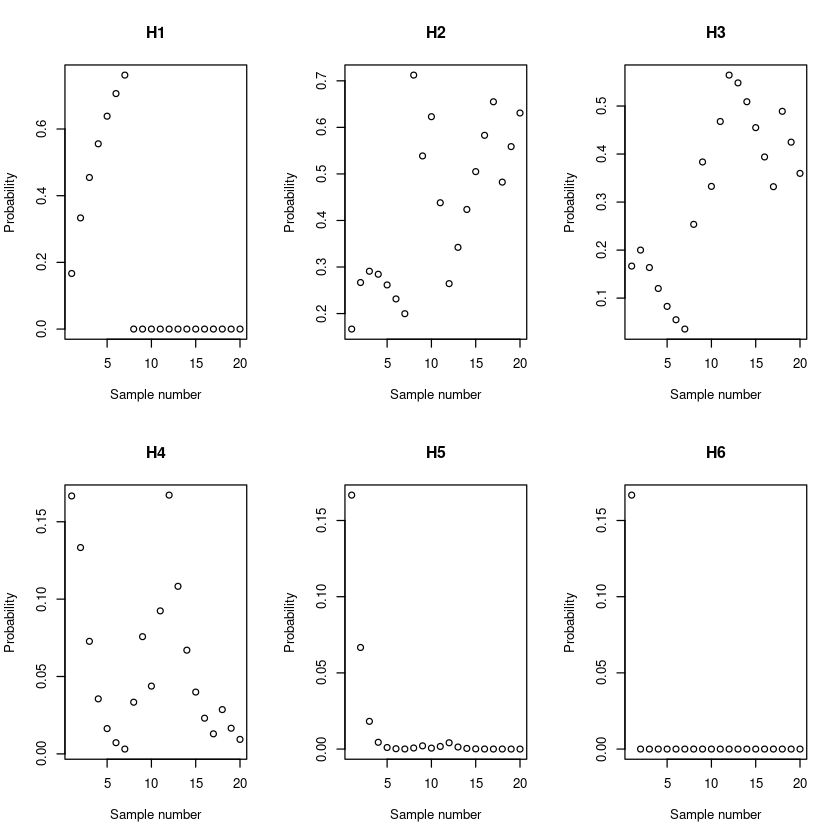

In [178]:
layout(matrix(1:6, nrow=2, ncol = 3, byrow = TRUE))
for (i in 1:6){
    plot(1:(length(inp)+1), prob[i,0:(length(inp)+1)], main = paste0("H",i), xlab="Sample number", ylab="Probability")
    }

## Exercise 2

In the same way a random box can be extracted and the sampling procedure can be automatic and the inference procedure can be seen as in the previous case. Again, the plot is done only at the end, but it can be see at each iteration using a R script.

In [144]:
h1 = c(1,1,1,1,1)
h2 = c(1,1,1,1,0)
h3 = c(1,1,1,0,0)
h4 = c(1,1,0,0,0)
h5 = c(1,0,0,0,0)
h6 = c(0,0,0,0,0)
boxes = list(h1,h2,h3,h4,h5,h6)

In [145]:
box = sample(1:6,1, replace = TRUE)

In [168]:
inp = c()
ask = FALSE
while (ask == FALSE) {
    temp = readline("Insert 0 to continue any key to exit")
    if ((temp == 0)) {
        inp = c(inp,sample(boxes[[box]],size=1, replace = TRUE))
    }
    else {break}
    prob = prob_hist(inp)
    

message("Probs: H0:",format(prob[1,(length(inp)+1)], nsmall = 2)," H1:",format(prob[2,(length(inp)+1)], nsmall = 2)," H2:",format(prob[3,(length(inp)+1)], nsmall = 2)," H3:",format(prob[4,(length(inp)+1)], nsmall = 2)," H4:",format(prob[5,(length(inp)+1)], nsmall = 2)," H5:",format(prob[6,(length(inp)+1)], nsmall = 2))
}


Insert o to continue any key to exit 0


Probs: H0:0.33 H1:0.27 H2:0.20 H3:0.13 H4:0.067 H5:0.00



Insert o to continue any key to exit 0


Probs: H0:0.45 H1:0.29 H2:0.16 H3:0.073 H4:0.018 H5:0.00



Insert o to continue any key to exit 0


Probs: H0:0.56 H1:0.28 H2:0.12 H3:0.036 H4:0.0044 H5:0.00



Insert o to continue any key to exit 0


Probs: H0:0.64 H1:0.26 H2:0.083 H3:0.016 H4:0.001 H5:0.00



Insert o to continue any key to exit 0


Probs: H0:0.71 H1:0.23 H2:0.055 H3:0.0072 H4:0.00023 H5:0.00



Insert o to continue any key to exit 0


Probs: H0:0.76 H1:0.20 H2:0.036 H3:0.0031 H4:4.9e-05 H5:0.00



Insert o to continue any key to exit 0


Probs: H0:0.00 H1:0.71 H2:0.25 H3:0.033 H4:7e-04 H5:0.00



Insert o to continue any key to exit 0


Probs: H0:0.00 H1:0.54 H2:0.38 H3:0.076 H4:0.0021 H5:0.00



Insert o to continue any key to exit 0


Probs: H0:0.00 H1:0.62 H2:0.33 H3:0.044 H4:0.00061 H5:0.00



Insert o to continue any key to exit 0


Probs: H0:0.00 H1:0.44 H2:0.47 H3:0.092 H4:0.0017 H5:0.00



Insert o to continue any key to exit 0


Probs: H0:0.00 H1:0.26 H2:0.56 H3:0.17 H4:0.0041 H5:0.00



Insert o to continue any key to exit 0


Probs: H0:0.00 H1:0.34 H2:0.55 H3:0.11 H4:0.0013 H5:0.00



Insert o to continue any key to exit 0


Probs: H0:0.00 H1:0.42 H2:0.51 H3:0.067 H4:0.00041 H5:0.00



Insert o to continue any key to exit 0


Probs: H0:0.00 H1:0.50 H2:0.45 H3:0.04 H4:0.00012 H5:0.00



Insert o to continue any key to exit 0


Probs: H0:0.00 H1:0.58 H2:0.39 H3:0.023 H4:3.6e-05 H5:0.00



Insert o to continue any key to exit 0


Probs: H0:0.00 H1:0.66 H2:0.33 H3:0.013 H4:1e-05 H5:0.00



Insert o to continue any key to exit 0


Probs: H0:0.00 H1:0.48 H2:0.49 H3:0.029 H4:2.9e-05 H5:0.00



Insert o to continue any key to exit 0


Probs: H0:0.00 H1:0.56 H2:0.42 H3:0.017 H4:8.5e-06 H5:0.00



Insert o to continue any key to exit 0


Probs: H0:0.00 H1:0.63 H2:0.36 H3:0.0094 H4:2.4e-06 H5:0.00



Insert o to continue any key to exit 


In [171]:
prob = prob_hist(inp)

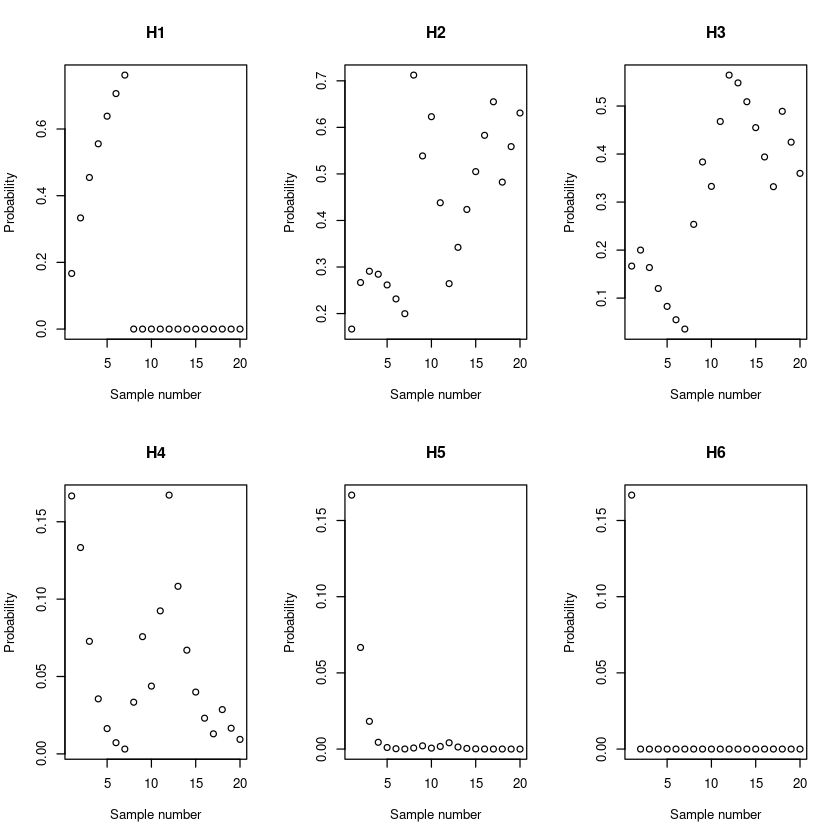

In [179]:
layout(matrix(1:6, nrow=2, ncol = 3, byrow = TRUE))
for (i in 1:6){
    plot(1:(length(inp)+1), prob[i,0:(length(inp)+1)], main = paste0("H",i), xlab="Sample number", ylab="Probability")
    }

## Exercise 3

Using the function rgamma is possible to sample from a gamma distribution, and given a integer value for the parameter $\alpha$ it becomes an Erlang distribution

In [ ]:
rgamma()

## Exercise 4

In [122]:
r_von_n = function(seed){
    len = length(unlist(strsplit(as.character(seed),"")))
    number <- unlist(strsplit(as.character(seed^2),""))
    len2 = length(number)
    if ((len2 - len)%%2 == 0){
        number = number[((len2 - len)/2+1):(len2-(len2 - len)/2)]    
    }
    else{
        number = number[((len2 - len+1)/2):(len2-(len2 - len+1)/2)]
    }
    return(as.numeric(paste(number, collapse="")))
}


In [152]:
sapply(1:1500,r_von_n)

[1]    1    4    9    1    2    3    4    6    8   10   12   14   16   19
  [15]   22   25   28   32   36   40   44   48   52   57   62   67   72   78
  [29]   84   90   96    2    8   15   22   29   36   44   52   60   68   76
  [43]   84   93    2   11   20   30   40   50   60   70   80   91    2   13
  [57]   24   36   48   60   72   84   96    9   22   35   48   62   76   90
  [71]    4   18   32   47   62   77   92    8   24   40   56   72   88    5
  [85]   22   39   56   74   92   10   28   46   64   83    2   21   40   60
  [99]   80    0   20   40   60   81  102  123  144  166  188  210  232  254
 [113]  276  299  322  345  368  392  416  440  464  488  512  537  562  587
 [127]  612  638  664  690  716  742  768  795  822  849  876  904  932  960
 [141]  988   16   44   73  102  131  160  190  220  250  280  310  340  371
 [155]  402  433  464  496  528  560  592  624  656  689  722  755  788  822
 [169]  856  890  924  958  992   27   62   97  132  168  204  240  276  312
 [183]  348  385  422  459  496  534  572  610  648  686  724  763  802  841
 [197]  880  920  960    0   40   80  120  161  202  243  284  326  368  410
 [211]  452  494  536  579  622  665  708  752  796  840  884  928  972   17
 [225]   62  107  152  198  244  290  336  382  428  475  522  569  616  664
 [239]  712  760  808  856  904  953    2   51  100  150  200  250  300  350
 [253]  400  451  502  553  604  656  708  760  812  864  916  969   22   75
 [267]  128  182  236  290  344  398  452  507  562  617  672  728  784  840
 [281]  896  952    8   65  122  179  236  294  352  410  468  526  584  643
 [295]  702  761  820  880  940    0   60  120  180  241  302  363  424  486
 [309]  548  610  672  734  796  859  922  985    4   11   17   24   30   36
 [323]   43   49   56   62   69   75   82   89   95  102  108  115  122  128
 [337]  135  142  149  156  162  169  176  183  190  197  204  211  218  225
 [351]  232  239  246  253  260  267  274  281  288  296  303  310  317  324
 [365]  332  339  346  354  361  369  376  383  391  398  406  413  421  428
 [379]  436  444  451  459  466  474  482  489  497  505  513  521  528  536
 [393]  544  552  560  568  576  584  592  600  608  616  624  632  640  648
 [407]  656  664  672  681  689  697  705  713  722  730  738  747  755  764
 [421]  772  780  789  797  806  814  823  831  840  849  857  866  874  883
 [435]  892  900  909  918  927  936  944  953  962  971  980  989  998    7
 [449]   16   25   34   43   52   61   70   79   88   97  106  116  125  134
 [463]  143  152  162  171  180  190  199  209  218  227  237  246  256  265
 [477]  275  284  294  304  313  323  332  342  352  361  371  381  391  401
 [491]  410  420  430  440  450  460  470  480  490  500  510  520  530  540
 [505]  550  560  570  580  590  601  611  621  631  641  652  662  672  683
 [519]  693  704  714  724  735  745  756  766  777  787  798  809  819  830
 [533]  840  851  862  872  883  894  905  916  926  937  948  959  970  981
 [547]  992    3   14   25   36   47   58   69   80   91  102  113  124  136
 [561]  147  158  169  180  192  203  214  226  237  249  260  271  283  294
 [575]  306  317  329  340  352  364  375  387  398  410  422  433  445  457
 [589]  469  481  492  504  516  528  540  552  564  576  588  600  612  624
 [603]  636  648  660  672  684  696  708  721  733  745  757  769  782  794
 [617]  806  819  831  844  856  868  881  893  906  918  931  943  956  969
 [631]  981  994    6   19   32   44   57   70   83   96  108  121  134  147
 [645]  160  173  186  199  212  225  238  251  264  277  290  303  316  329
 [659]  342  356  369  382  395  408  422  435  448  462  475  489  502  515
 [673]  529  542  556  569  583  596  610  624  637  651  664  678  692  705
 [687]  719  733  747  761  774  788  802  816  830  844  858  872  886  900
 [701]  914  928  942  956  970  984  998   12   26   41   55   69   83   97
 [715]  112  126  140  155  169  184  198  212  227  241  256  270  285  299